C:\Users\tarun\AppData\Local\Temp\ipykernel_4948\1413014410.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mi_series.values, y=mi_series.index, palette='viridis')


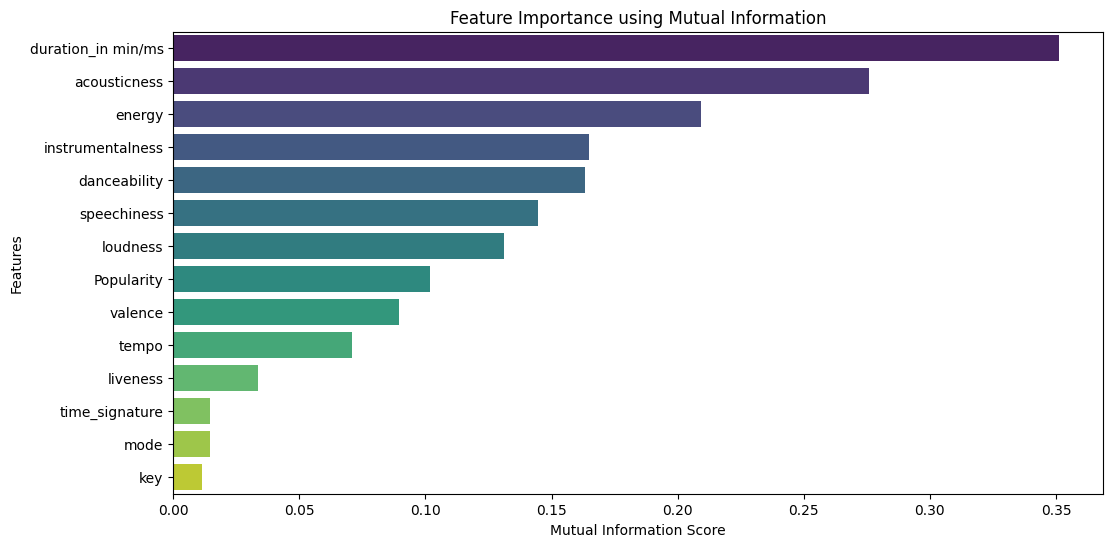

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load dataset
train_df = pd.read_csv("../data/train.csv")

# Handle missing values only for numeric columns
numeric_cols = train_df.select_dtypes(include=['number']).columns
train_df[numeric_cols] = train_df[numeric_cols].fillna(train_df[numeric_cols].median())

# Encode categorical target variable
label_encoder = LabelEncoder()
train_df['Class'] = label_encoder.fit_transform(train_df['Class'])

# Separate features and target
X = train_df.select_dtypes(include=['number']).drop(columns=['Class'], errors='ignore')
y = train_df['Class']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Compute mutual information
mi_scores = mutual_info_classif(X_scaled, y)
mi_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x=mi_series.values, y=mi_series.index, palette='viridis')
plt.xlabel("Mutual Information Score")
plt.ylabel("Features")
plt.title("Feature Importance using Mutual Information")
plt.show()